# Firsts Experiment

In this notebook is implemented the first experiment presented in the memory. In an schematich way.

<img src="Exp1.png">

To run the experiment over real backends set secure_mode=False. Otherwhise results will be recovered from past experiments. 

In [2]:
secure_mode=True

# Yang Baxter Gate

The following code implements the gate

\begin{equation}
    \mathfrak{R}^{c}(x)=\frac{\sinh(x-i\theta)}{{\sinh(x)^2+\sin(\theta)^2}}
    \left(
        \begin{array}{cccc}
    \sinh(x+i\theta) & 0 & 0 & 0\\
    0 &   \sinh(x)  & i\sin({\theta}) & 0 \\
    0 & i\sin({\theta}) & \sinh(x)   &  0\\
    0 & 0 & 0 & \sinh(x+i\theta)  \\
    \end{array}
    \right),
\end{equation}


which fulfill the equation 

Yang-Baxter equation is fulfilled.

\begin{equation}
   \mathfrak{R}^\theta_{23}(y) \mathfrak{R}_{13}^\theta(x+y)\mathfrak{R}_{12}^\theta(x)=   \mathfrak{R}_{12}^\theta(x)\mathfrak{R}_{13}^\theta(x+y)\mathfrak{R}^\theta_{23}(y)
    \end{equation}

and for

\begin{equation}
    R^\theta(x)=P_{12}\mathfrak{R}^\theta(x)
\end{equation}

\begin{equation}
\left(R^{\theta}(y)\otimes\mathbb{1}\right)\left(\mathbb{1}\otimes R^\theta(x+y)\right)\left(R^{\theta}(x)\otimes\mathbb{1}\right)=
    \left(\mathbb{1}\otimes R^\theta(x)\right)\left(R^{\theta}(x+y)\otimes\mathbb{1}\right)\left(\mathbb{1}\otimes R^\theta(y)\right)\end{equation}

Also

\begin{equation}
    P_{13}\mathfrak{R}^\theta_{23}(y) \mathfrak{R}_{13}^\theta(x+y)\mathfrak{R}_{12}^\theta(x)= \left(R^{\theta}(y)\otimes\mathbb{1}\right)\left(\mathbb{1}\otimes R^\theta(x+y)\right)\left(R^{\theta}(x)\otimes\mathbb{1}\right)
\end{equation}


In other parametrization
$$
    \mathfrak{R}^{c}(\varphi_x,\omega_x)=\left(\begin{array}{cccc}
        1 & 0 & 0 & 0\\
        0 & e^{i\varphi_x}\cos\big(\frac{\omega_x}{2}\big) & i e^{i\varphi_x}\sin\big(\frac{\omega_x}{2}\big) & 0 \\
        0 &  i e^{i\varphi_x}\sin\big(\frac{\omega_x}{2}\big) & e^{i\varphi_x}\cos\big(\frac{\omega_x}{2}\big)  & 0\\
        0 & 0 & 0 & 1 \\
        \end{array}\right).
$$

## This particular example is such that  $\omega_{x}=\pi/2$ and $\omega_{xy}=2.14$ for $\theta=\pi/4$

In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit import Parameter
import numpy as np
import sympy as sy

from qiskit.circuit import Gate

IBMQ.load_account() # Load account from disk
IBMQ.providers()
provider=IBMQ.get_provider(hub='ibm-q-csic')
pi=np.pi

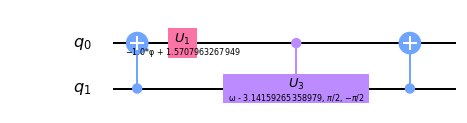

In [4]:
omega=Parameter('ω')
phi=Parameter('φ')



#crate gate 
Rb = QuantumCircuit(2, name='$R^b$')

Rb.cx(1,0)
Rb.u1(-phi+pi/2,0)
Rb.cu3(omega-pi, pi/2, -pi/2, 0,1)
Rb.cx(1,0)


# Draw the circuit
Rb.draw(output='mpl')

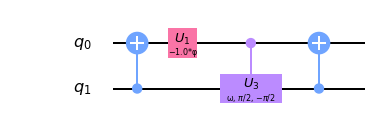

In [5]:
Ru = QuantumCircuit(2, name='$\mathfrak{R}$')

#center U3

Ru.cx(1,0)
Ru.u1(-phi,0)
Ru.cu3(omega, pi/2, -pi/2, 0,1)
Ru.cx(1,0)

# Draw the circuit
Ru.draw(output='mpl')

In [6]:
### obtain x,y from \omega_x, omega_{xy} and theta

def realParameter(omegax,omegaxy,theta):
    a=np.tan(omegax/2)
    b=np.tan(omegaxy/2)

    x=np.arcsinh(np.sin(theta)/a)
    y=np.arcsinh(np.sin(theta)/b)
    y=y-x
    return x,y,theta

In [7]:
#parameters that encode the action of YB, for further information look at the memory.
import math

def realCharacterizarion(x,y,theta):
    """
    INPUT:  'x'      --double; a value of the x  parameter                        
        'y'      --double; a value of the y  parameter
        'theta'  --double; a value of the theta  parameter 
    OUTPUT:
        'f'  --complex
        'g'  --complex
        'desired_vector'  --List(complex): v
    """
    norm=np.sqrt(np.sinh(x)**2+np.sin(theta)**2)*np.sqrt(np.sinh(x+y)**2+np.sin(theta)**2)*np.sqrt(np.sinh(y)**2+np.sin(theta)**2)
    i=complex(0,1);
    e=math.e
    g=np.sinh(x+y)*(np.sinh(y)*np.cos(theta)+i*np.sin(theta)*np.cosh(y))*np.sinh(x)/norm

    f=(np.sinh(x)*np.cos(theta)+i*np.sin(theta)*np.cosh(x))*(np.sinh(x+y)*np.cos(theta)+i*np.sin(theta)*np.cosh(x+y))*(np.sinh(y)*np.cos(theta)+i*np.sin(theta)*np.cosh(y))/norm

    desired_vector = [
        i*np.sin(theta)*(np.sinh(y)*np.cos(theta)+i*np.sin(theta)*np.cosh(y))*(np.sinh(x)*np.cos(theta)+i*np.sin(theta)*np.cosh(x))/norm,
        i*np.sin(theta)*(np.sinh(y)*np.cos(theta)+i*np.sin(theta)*np.cosh(y))*math.sinh(x+y)/norm
        ]
    return f,g, desired_vector/np.sqrt(1-(g*g.conjugate()).real)

we can prepare the state 

$$
    |\psi_{v^*}>=\frac{1}{\sqrt{1-\lvert \boldsymbol{g}\rvert^2}}\left(v_1^*|001>+v_2^*|010>\right)
$$

Then 

$$
    \mathcal{YB}^u(x,y)|\psi_{v^*}>=-\boldsymbol{g}^*|\psi_{v^*}>^*+\sqrt{1-\lvert \boldsymbol{g}\rvert^2}|100>
$$

In the same way 

$$
    |\psi_{v_\perp}>=\frac{1}{\sqrt{1-\lvert \boldsymbol{g}\rvert^2}}\left(v_2)|110>-v_1|101>\right)
$$

thus

$$
    \mathcal{YB}^u(x,y)|\psi_{v_\perp}>=-\boldsymbol{f}|\psi_{v_\perp}>^*
$$

$$
   |\psi>=\frac{1}{\sqrt{2}}|\psi_{v^*}>+\frac{1}{\sqrt{2}}|\psi_{v_\perp}>
$$


In [8]:
#We choose the parameters with the help of RealDecide to have |g|\simeq 1/3
x1,x2,theta=realParameter(pi/2,2.14,pi/4)
#We obtain the characterization factors
f,g,v=realCharacterizarion(x1,x2,theta)


#the initial state following our convention
desired_vector=np.array([0,v[0].conjugate()/np.sqrt(2),v[1].conjugate()/np.sqrt(2),0,0,v[0]/np.sqrt(2),-v[1]/np.sqrt(2),0])


p13=np.array([
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,1]
])

#the initial state following qiskit convention
#WARNING THIS STEP IS IMPORTANT
desired_vector=p13.dot(desired_vector)


# Yang Baxter equation

## Braided equation

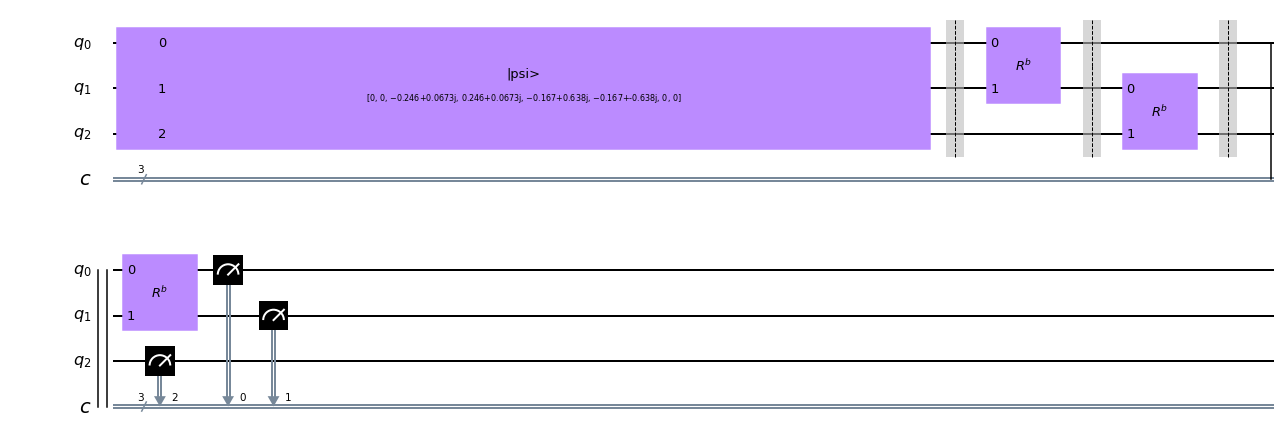

In [9]:
phis=[Parameter('φ_'+str(i)) for i in range(1,4)]
omegas=[Parameter('ω_'+str(i)) for i in range(1,4)]

YBs=[Rb.to_gate({phi:phis[i],omega:omegas[i]}) for i in range(0,3)]
lhsBc=QuantumCircuit(3,3, name='$lhsBc$')
lhsBc.initialize(desired_vector, [0,1,2])
lhsBc.barrier()
lhsBc.append(YBs[0], [0,1])
lhsBc.barrier()
lhsBc.append(YBs[1], [1,2])
lhsBc.barrier()
lhsBc.append(YBs[2], [0,1])
lhsBc.measure([0,1,2],[0,1,2])

# Map the quantum measurement to the classical bits
lhsBc.draw(output='mpl')


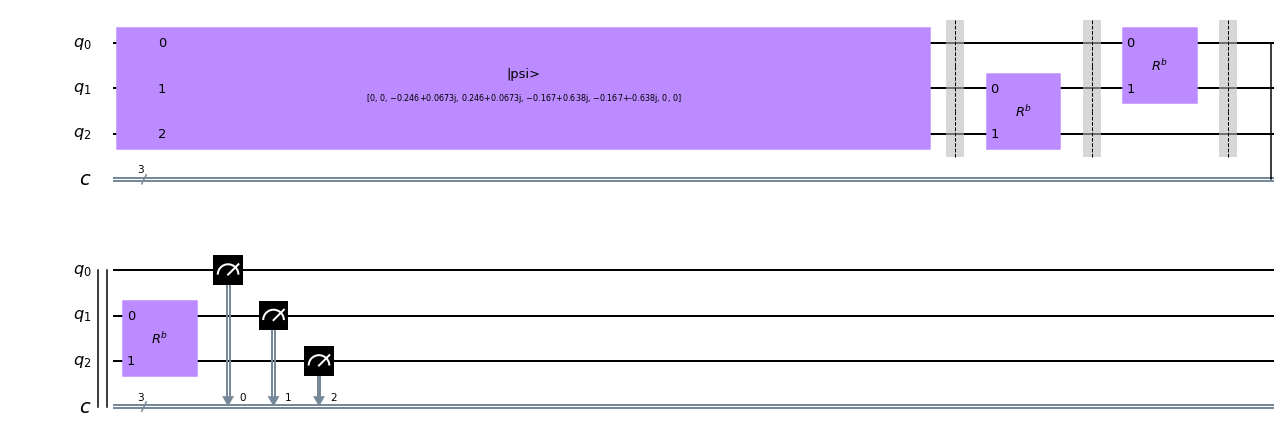

In [10]:
rhsBc=QuantumCircuit(3,3, name='$lhsBc$')
rhsBc.initialize(desired_vector, [0,1,2])
rhsBc.barrier()
rhsBc.append(YBs[2], [1,2])
rhsBc.barrier()
rhsBc.append(YBs[1], [0,1])
rhsBc.barrier()
rhsBc.append(YBs[0], [1,2])
rhsBc.measure([0,1,2],[0,1,2])


# Map the quantum measurement to the classical bits
rhsBc.draw(output='mpl')

## Universal equation

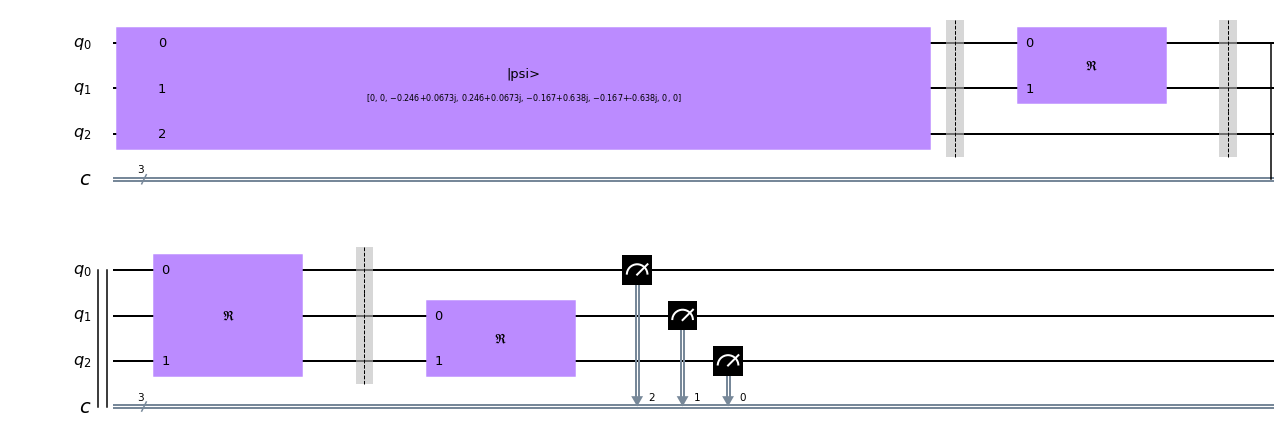

In [11]:
YBs=[Ru.to_gate({phi:phis[i],omega:omegas[i]}) for i in range(0,3)]
lhsUc=QuantumCircuit(3,3, name='$lhsBc$')
lhsUc.initialize(desired_vector, [0,1,2])
lhsUc.barrier()
lhsUc.append(YBs[0], [0,1])
lhsUc.barrier()
lhsUc.append(YBs[1], [0,2])
lhsUc.barrier()
lhsUc.append(YBs[2], [1,2])
lhsUc.measure([0,1,2],[2,1,0])

# Map the quantum measurement to the classical bits
lhsUc.draw(output='mpl')

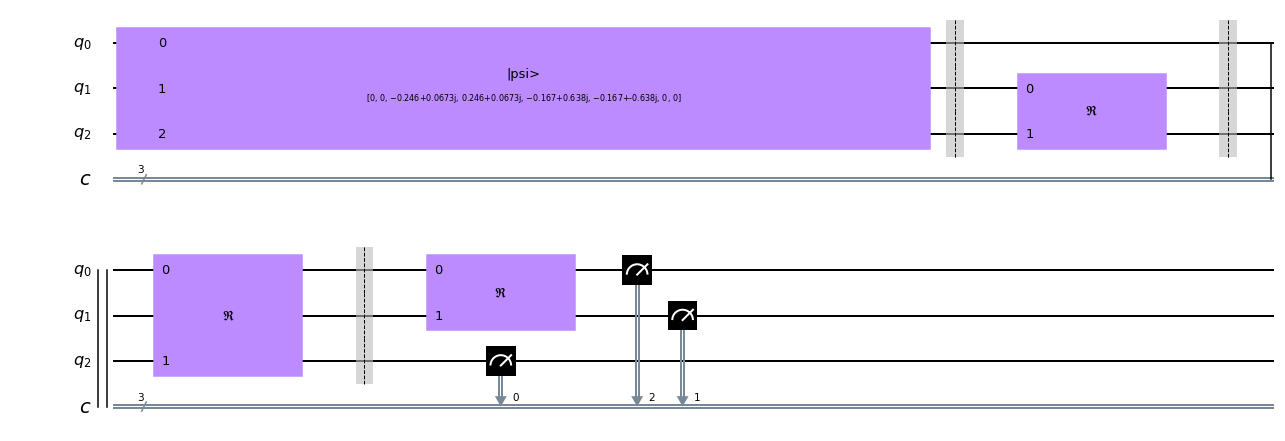

In [12]:
rhsUc=QuantumCircuit(3,3, name='$lhsBc$')
rhsUc.initialize(desired_vector, [0,1,2])
rhsUc.barrier()
rhsUc.append(YBs[2], [1,2])
rhsUc.barrier()
rhsUc.append(YBs[1], [0,2])
rhsUc.barrier()
rhsUc.append(YBs[0], [0,1])
rhsUc.measure([0,1,2],[2,1,0])

# Map the quantum measurement to the classical bits
rhsUc.draw(output='mpl')

We have to fix
\begin{equation}
    \tilde{\boldsymbol{\varphi}}=\left(\varphi_x,\varphi_{x+y},\varphi_y\right),\ \  \tilde{\boldsymbol{\omega}}=\left(\omega_x,\omega_{x+y},\omega_y\right).
\end{equation}
such that 
\begin{eqnarray}
    \sin(\varphi_z)= N\cosh(z)\sin(\theta),&\ \ &\cos(\varphi_z)=N\sinh(z)\cos(\theta),\\
    \sin(\omega_z/2)=N\sin({\theta}),& \ \ \ &\cos(\omega_z/2)=N\sinh(z).
\end{eqnarray}

In [13]:
#For x1,x2 and theta given it returns the binding of the parameters of the critical gates

import math
def realAngles(x1,x2,theta,phis,omegas):
        """
         INPUT: 'x1'  --double; x parameter
                'x2' --double; y parameter
                'theta' --double; theta parameter
         OUTPUT: --{Parameter:double}; Values of the parameters for the 
                    given inputs
         EXAMPLES:
        """
        h=[x1,x1+x2,x2]
        subsprim={}
        for i in range(3):
            subsprim.update({phis[i]:np.angle(complex(np.sinh(h[i])*np.cos(theta),
                                            np.cosh(h[i])*np.sin(theta))) ,
             omegas[i]:2*np.angle(complex(np.sinh(h[i]),np.sin(theta))) }
            )
        return subsprim

# Execution over real backends

In [14]:


#parameters binded
subsprim=realAngles(x1,x2,theta,phis,omegas)

#inital state measurement
circuit01=QuantumCircuit(3,3)
circuit01.initialize(desired_vector, [0,1,2]);
circuit01.measure([0,1,2],[2,1,0])

circuit02=QuantumCircuit(3,3)
circuit02.initialize(desired_vector, [0,1,2]);
circuit02.measure([0,1,2],[0,1,2])


# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

job1={}
job2={}
job3={}
job4={}
job0={}

TO RUN IN SECURE MODE


In [15]:
import pickle
import matplotlib.pyplot as plt
def suma(a,b):
    au=a
    bu=b
    c={}
    c.update(au)
    c.update(bu)
    for x in au:
        try:
            c.update({x:au[x]+bu[x]})
        except:
            ;
    for x in bu:
        try:
            c.update({x:au[x]+bu[x]})
        except:
            ;
    return c

color=['#4D0EFA', '#648fff', '#008404', '#ffb000', '#fe6100']

if secure_mode:
    plots={}
    file="experiments/First_Experiment_Full_26_5_2020_19_4.pkl"
    pickle_off = open(file,"rb")
    job = pickle.load(pickle_off)
    pickle_off.close()


    aux= job['parameters']
    tit=' x='+"{:.3f}".format(aux['x'])+', y='+"{:.3f}".format(aux['y'])+', $\\theta=\pi/2$'

    for i in range(5):
        job['qasm_simulator'][i].update({'011':0})  
        job['qasm_simulator_perp'][i].update({'011':0}) 


 

# Simulator

In [16]:
#Let's transpile the circuit first
# Real Backend
key='ibmq_ourense'
backend = provider.get_backend(key)
#from qiskit.test.mock import FakeTokyo
#backend=FakeTokyo()

initial_layout=[0,1,2]

lhsUct = transpile(lhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBct = transpile(lhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBct = transpile(rhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUct = transpile(rhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUct = lhsUct.bind_parameters(subsprim)
lhsBct = lhsBct.bind_parameters(subsprim)
rhsBct = rhsBct.bind_parameters(subsprim)
rhsUct = rhsUct.bind_parameters(subsprim)




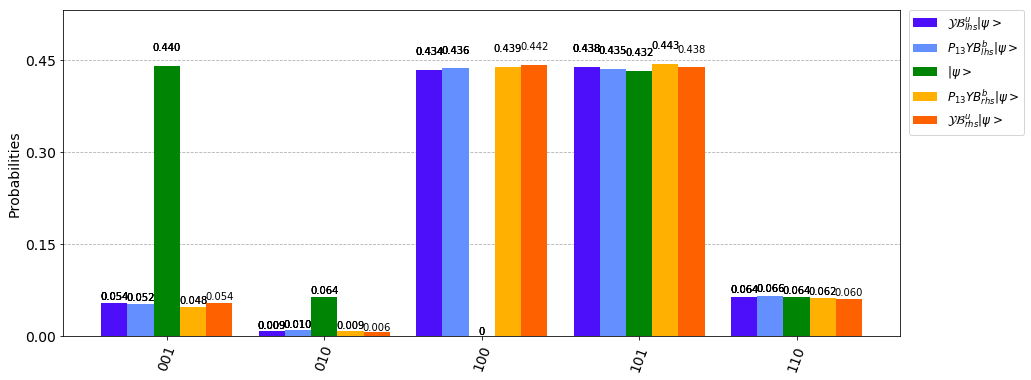

In [17]:
#Algorithm execution
# Use Aer's qasm_simulator
key='qasm_simulator'
backend = Aer.get_backend(key)
shots=8192


#separated algorithms
job0.update({key:execute(lhsUct, backend, shots=shots)})
job1.update({key:execute(lhsBct, backend, shots=shots)})
#initial state
job2.update({key:execute(circuit01t, backend, shots=shots)})


#adjacent algorithms
job3.update({key:execute(rhsBct, backend, shots=shots)})
job4.update({key:execute(rhsUct, backend, shots=shots)})
#initial state
#job02=execute(circuit02, backend, shots=shots) 

legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
plot_histogram([job0[key].result().get_counts(),
                job1[key].result().get_counts(),
                job2[key].result().get_counts(),
                job3[key].result().get_counts(),
                job4[key].result().get_counts()],figsize=(15,6),legend=legend,color=color)

# Experiment with ibmx_ourense

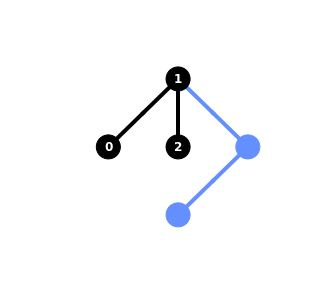

In [18]:
# Real Backend
key='ibmq_ourense'
backend = provider.get_backend(key)
#from qiskit.test.mock import FakeTokyo
#backend=FakeTokyo()

initial_layout=[0,1,2]

lhsUct = transpile(lhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBct = transpile(lhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBct = transpile(rhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUct = transpile(rhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUct = lhsUct.bind_parameters(subsprim)
lhsBct = lhsBct.bind_parameters(subsprim)
rhsBct = rhsBct.bind_parameters(subsprim)
rhsUct = rhsUct.bind_parameters(subsprim)


plot_circuit_layout(rhsUct, backend)

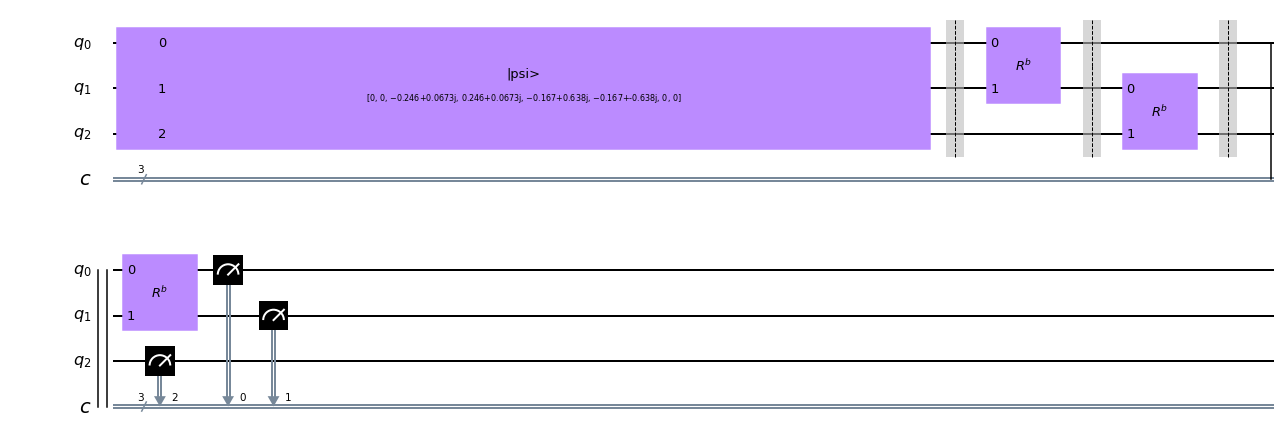

In [19]:
lhsBc.draw(output='mpl')

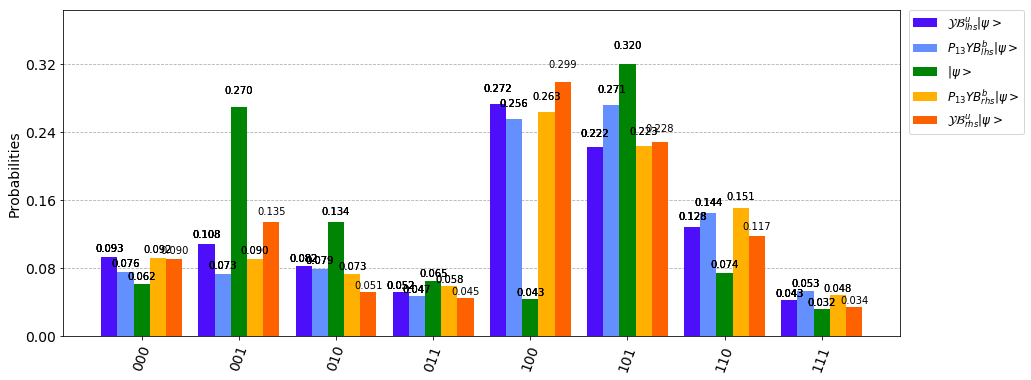

In [20]:
#Algorithm execution
if secure_mode:
    #separated algorithms
    job0.update({key:job[key][0]})
    job1.update({key:job[key][1]})
    #initial state
    job2.update({key:job[key][2]})


    #adjacent algorithms
    job3.update({key:job[key][3]})
    job4.update({key:job[key][4]})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([job0[key],job1[key],job2[key],job3[key],job4[key]],figsize=(15,6),legend=legend,color=color)

else:
    shots=8192

    #separated algorithms
    job0.update({key:execute(lhsUct, backend, shots=shots)})
    job1.update({key:execute(lhsBct, backend, shots=shots)})
    #initial state
    job2.update({key:execute(circuit01t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({key:execute(rhsBct, backend, shots=shots)})
    job4.update({key:execute(rhsUct, backend, shots=shots)})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([job0[key].result().get_counts(),
                      job1[key].result().get_counts(),
                      job2[key].result().get_counts(),
                      job3[key].result().get_counts(),
                      job4[key].result().get_counts()],figsize=(15,6),legend=legend,color=color)


p

The initial sate is preparated with the circuit

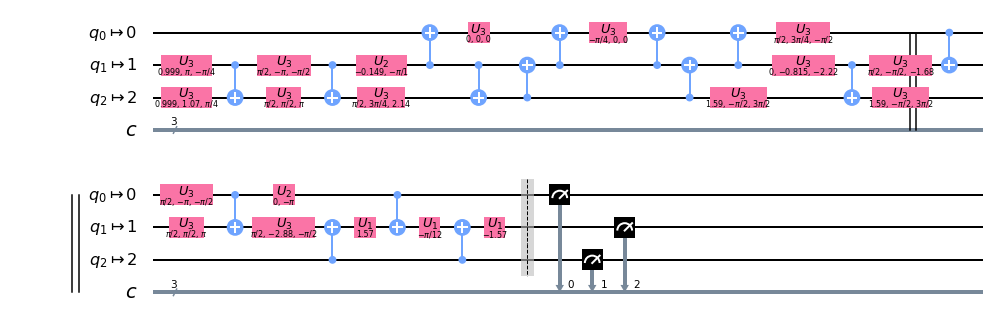

In [21]:
circuit01t.draw(output='mpl', scale=0.5,idle_wires=False)


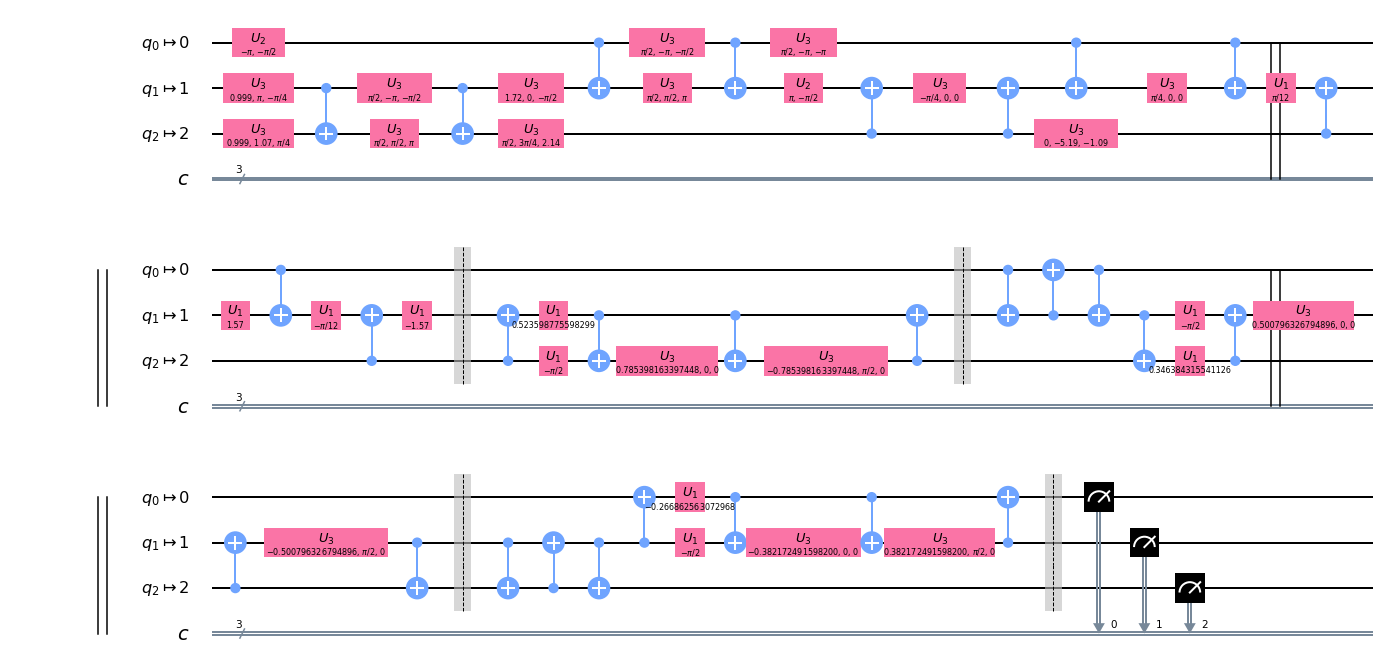

In [22]:
lhsBct.draw(output='mpl',idle_wires=False)

# Experiment with ibmqx2

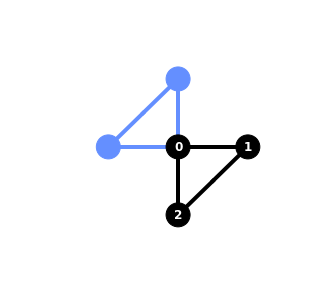

In [23]:
# Real Backend
key='ibmqx2'
backend = provider.get_backend(key)


initial_layout=[2,3,4]


lhsUct = transpile(lhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBct = transpile(lhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBct = transpile(rhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUct = transpile(rhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUct = lhsUct.bind_parameters(subsprim)
lhsBct = lhsBct.bind_parameters(subsprim)
rhsBct = rhsBct.bind_parameters(subsprim)
rhsUct = rhsUct.bind_parameters(subsprim)


plot_circuit_layout(rhsUct, backend)

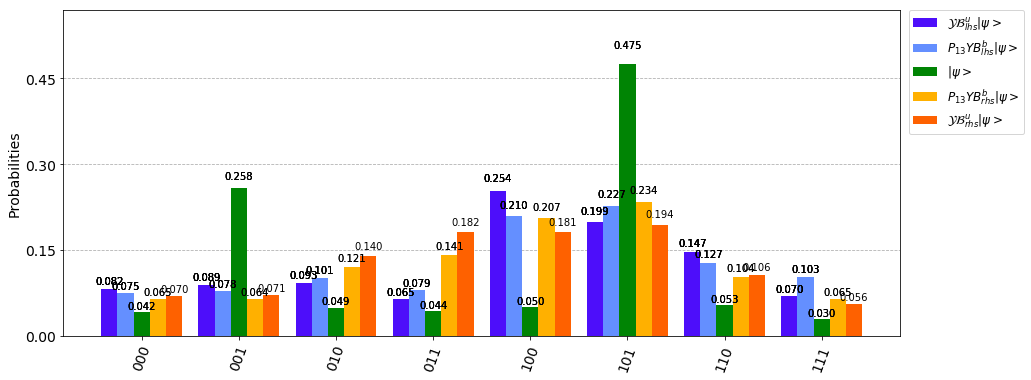

In [24]:
#Algorithm execution
if secure_mode:
    #separated algorithms
    job0.update({key:job[key][0]})
    job1.update({key:job[key][1]})
    #initial state
    job2.update({key:job[key][2]})


    #adjacent algorithms
    job3.update({key:job[key][3]})
    job4.update({key:job[key][4]})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([job0[key],job1[key],job2[key],job3[key],job4[key]],figsize=(15,6),legend=legend,color=color)

else:
    shots=8192

    #separated algorithms
    job0.update({key:execute(lhsUct, backend, shots=shots)})
    job1.update({key:execute(lhsBct, backend, shots=shots)})
    #initial state
    job2.update({key:execute(circuit01t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({key:execute(rhsBct, backend, shots=shots)})
    job4.update({key:execute(rhsUct, backend, shots=shots)})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([job0[key].result().get_counts(),job1[key].result().get_counts(),job2[key].result().get_counts(),job3[key].result().get_counts(),job4[key].result().get_counts()],figsize=(15,6),legend=legend,color=color)


p

# Experiment in ibmq_johannesburg

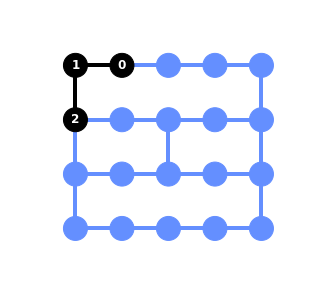

In [25]:
# Real Backend
key='ibmq_johannesburg'
backend = provider.get_backend(key)


initial_layout=[1,0,5]

lhsUct = transpile(lhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBct = transpile(lhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBct = transpile(rhsBc, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUct = transpile(rhsUc, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUct = lhsUct.bind_parameters(subsprim)
lhsBct = lhsBct.bind_parameters(subsprim)
rhsBct = rhsBct.bind_parameters(subsprim)
rhsUct = rhsUct.bind_parameters(subsprim)


plot_circuit_layout(rhsUct, backend)

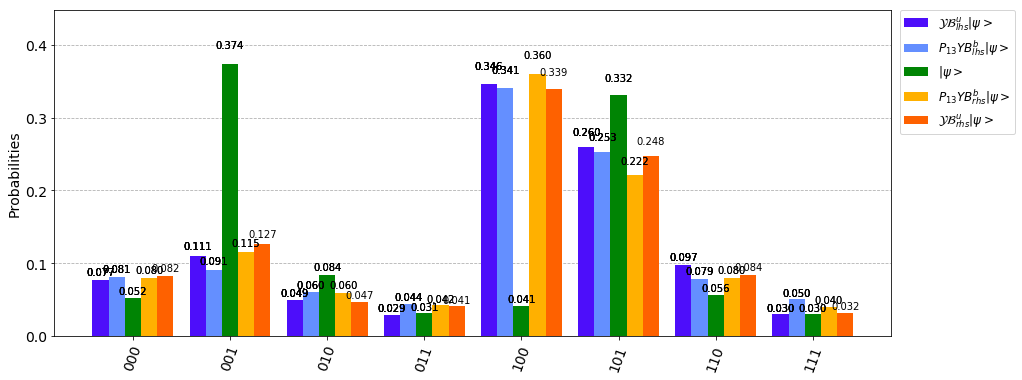

In [26]:
#Algorithm execution
if secure_mode:
    #separated algorithms
    job0.update({key:job[key][0]})
    job1.update({key:job[key][1]})
    #initial state
    job2.update({key:job[key][2]})


    #adjacent algorithms
    job3.update({key:job[key][3]})
    job4.update({key:job[key][4]})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([job0[key],
                    job1[key],
                    job2[key],
                    job3[key],
                    job4[key]]
                    ,figsize=(15,6),legend=legend,color=color)

else:
    shots=8192

    #separated algorithms
    job0.update({key:execute(lhsUct, backend, shots=shots)})
    job1.update({key:execute(lhsBct, backend, shots=shots)})
    #initial state
    job2.update({key:execute(circuit01t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({key:execute(rhsBct, backend, shots=shots)})
    job4.update({key:execute(rhsUct, backend, shots=shots)})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([job0[key].result().get_counts(),
                    job1[key].result().get_counts(),
                    job2[key].result().get_counts(),
                    job3[key].result().get_counts(),
                    job4[key].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)


p

# First Experiment in two steps

Most of the errors come from the difficulty of create a complicated initial state. Due to total spin conservation for any state of the computational basis $|a>$

$$Tr\left[\mathcal{YB}^u\left(|\psi_{v^*}><\psi_{v_\perp}|+|\psi_{v_\perp}><\psi_{v^*}|\right){\mathcal{YB}^u}^{\dagger}|a><a|\right]=0$$

Then we can reproduce the results with the mix state  
   
$$\tilde{\rho}=\frac{1}{2}|\psi_{v^*}><\psi_{v^*}|+\frac{1}{2}|\psi_{v_\perp}><\psi_{v_\perp}|$$

that in practice can be achieved performing two experiments  one with $|\psi>\to|\psi_{v^*}>$ and other with $|\psi>\to|\psi_{v_\perp}>$.

We will redefine each circuit to run them in a single experiment


In [27]:

#First initial state
desired_vectora=np.array([0,v[0].conjugate(),v[1].conjugate(),0,0,0,0,0])

#Second initial state
desired_vectorb=np.array([0,0,0,0,0,v[0],-v[1],0])

#the initial state following qiskit convention
#WARNING THIS STEP IS IMPORTANT
desired_vectora=p13.dot(desired_vectora)
desired_vectorb=p13.dot(desired_vectorb)



phis=[Parameter('φ_'+str(i)) for i in range(1,4)]
omegas=[Parameter('ω_'+str(i)) for i in range(1,4)]

YBs=[Rb.to_gate({phi:phis[i],omega:omegas[i]}) for i in range(0,3)]
lhsBca=QuantumCircuit(3,3, name='$lhsBc$')
lhsBca.initialize(desired_vectora, [0,1,2])
lhsBca.barrier()
lhsBca.append(YBs[0], [0,1])
lhsBca.barrier()
lhsBca.append(YBs[1], [1,2])
lhsBca.barrier()
lhsBca.append(YBs[2], [0,1])
lhsBca.measure([0,1,2],[0,1,2])

rhsBca=QuantumCircuit(3,3, name='$lhsBc$')
rhsBca.initialize(desired_vectora, [0,1,2])
rhsBca.barrier()
rhsBca.append(YBs[2], [1,2])
rhsBca.barrier()
rhsBca.append(YBs[1], [0,1])
rhsBca.barrier()
rhsBca.append(YBs[0], [1,2])
rhsBca.measure([0,1,2],[0,1,2])

YBs=[Rb.to_gate({phi:phis[i],omega:omegas[i]}) for i in range(0,3)]
lhsBcb=QuantumCircuit(3,3, name='$lhsBc$')
lhsBcb.initialize(desired_vectorb, [0,1,2])
lhsBcb.barrier()
lhsBcb.append(YBs[0], [0,1])
lhsBcb.barrier()
lhsBcb.append(YBs[1], [1,2])
lhsBcb.barrier()
lhsBcb.append(YBs[2], [0,1])
lhsBcb.measure([0,1,2],[0,1,2])

rhsBcb=QuantumCircuit(3,3, name='$lhsBc$')
rhsBcb.initialize(desired_vectorb, [0,1,2])
rhsBcb.barrier()
rhsBcb.append(YBs[2], [1,2])
rhsBcb.barrier()
rhsBcb.append(YBs[1], [0,1])
rhsBcb.barrier()
rhsBcb.append(YBs[0], [1,2])
rhsBcb.measure([0,1,2],[0,1,2])

YBs=[Ru.to_gate({phi:phis[i],omega:omegas[i]}) for i in range(0,3)]

lhsUca=QuantumCircuit(3,3, name='$lhsBc$')
lhsUca.initialize(desired_vectora, [0,1,2])
lhsUca.barrier()
lhsUca.append(YBs[0], [0,1])
lhsUca.barrier()
lhsUca.append(YBs[1], [0,2])
lhsUca.barrier()
lhsUca.append(YBs[2], [1,2])
lhsUca.measure([0,1,2],[2,1,0])

rhsUca=QuantumCircuit(3,3, name='$lhsBc$')
rhsUca.initialize(desired_vectora, [0,1,2])
rhsUca.barrier()
rhsUca.append(YBs[2], [1,2])
rhsUca.barrier()
rhsUca.append(YBs[1], [0,2])
rhsUca.barrier()
rhsUca.append(YBs[0], [0,1])
rhsUca.measure([0,1,2],[2,1,0])

lhsUcb=QuantumCircuit(3,3, name='$lhsBc$')
lhsUcb.initialize(desired_vectorb, [0,1,2])
lhsUcb.barrier()
lhsUcb.append(YBs[0], [0,1])
lhsUcb.barrier()
lhsUcb.append(YBs[1], [0,2])
lhsUcb.barrier()
lhsUcb.append(YBs[2], [1,2])
lhsUcb.measure([0,1,2],[2,1,0])

rhsUcb=QuantumCircuit(3,3, name='$lhsBc$')
rhsUcb.initialize(desired_vectorb, [0,1,2])
rhsUcb.barrier()
rhsUcb.append(YBs[2], [1,2])
rhsUcb.barrier()
rhsUcb.append(YBs[1], [0,2])
rhsUcb.barrier()
rhsUcb.append(YBs[0], [0,1])
rhsUcb.measure([0,1,2],[2,1,0]);

Initial state measurements

In [28]:

#inital state measurement
circuit01=QuantumCircuit(3,3)
circuit01.initialize(desired_vectora, [0,1,2]);
circuit01.measure([0,1,2],[2,1,0])

circuit02=QuantumCircuit(3,3)
circuit02.initialize(desired_vectorb, [0,1,2]);
circuit02.measure([0,1,2],[2,1,0]);


#parameters binded
subsprim=realAngles(x1,x2,theta,phis,omegas)

In [29]:
def sumajob(a,b):
    au=a.result().get_counts()
    bu=b.result().get_counts()
    c={}
    c.update(au)
    c.update(bu)
    for x in au:
        try:
            c.update({x:au[x]+bu[x]})
        except:
            ;
    for x in bu:
        try:
            c.update({x:au[x]+bu[x]})
        except:
            ;
    return c

# Simulator

In [30]:

# Real Backend
key='ibmq_ourense'
backend = provider.get_backend(key)


initial_layout=[0,1,2]


lhsUcta = transpile(lhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBcta = transpile(lhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBcta = transpile(rhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUcta = transpile(rhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUcta = lhsUcta.bind_parameters(subsprim)
lhsBcta = lhsBcta.bind_parameters(subsprim)
rhsBcta = rhsBcta.bind_parameters(subsprim)
rhsUcta = rhsUcta.bind_parameters(subsprim)

lhsUctb = transpile(lhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBctb = transpile(lhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBctb = transpile(rhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUctb = transpile(rhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit02t = transpile(circuit02, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsUctb = lhsUctb.bind_parameters(subsprim)
lhsBctb = lhsBctb.bind_parameters(subsprim)
rhsBctb = rhsBctb.bind_parameters(subsprim)
rhsUctb = rhsUctb.bind_parameters(subsprim)


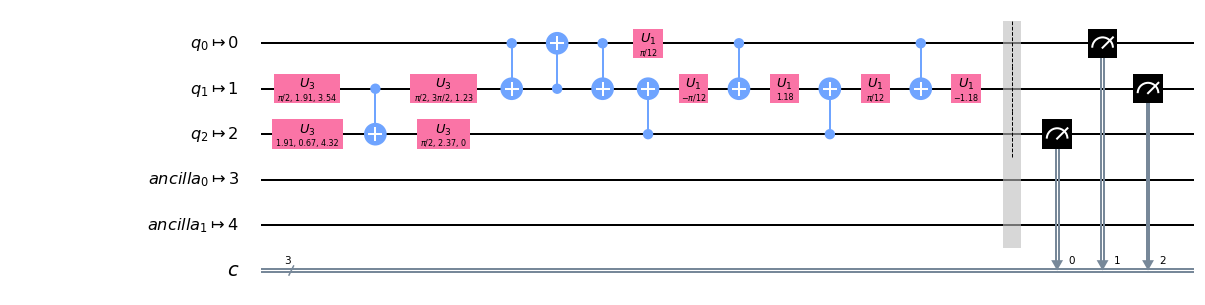

In [31]:
circuit01t.draw(output='mpl')

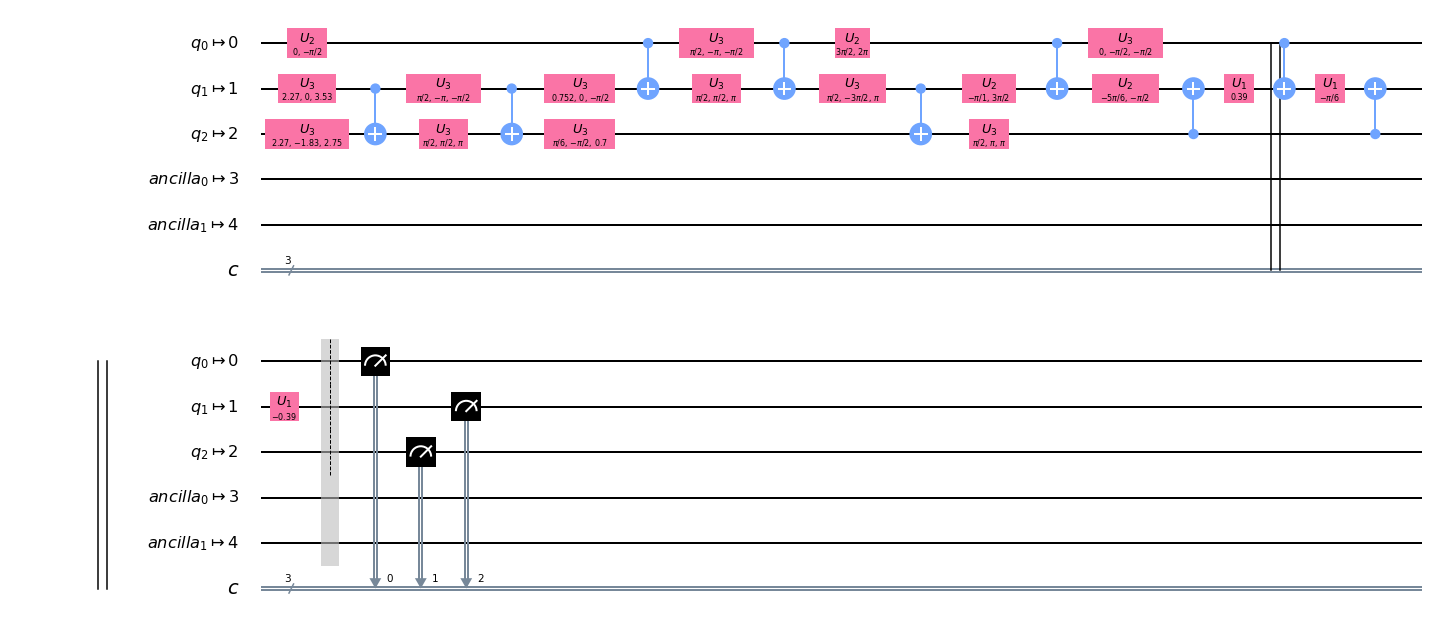

In [32]:
circuit02t.draw(output='mpl')

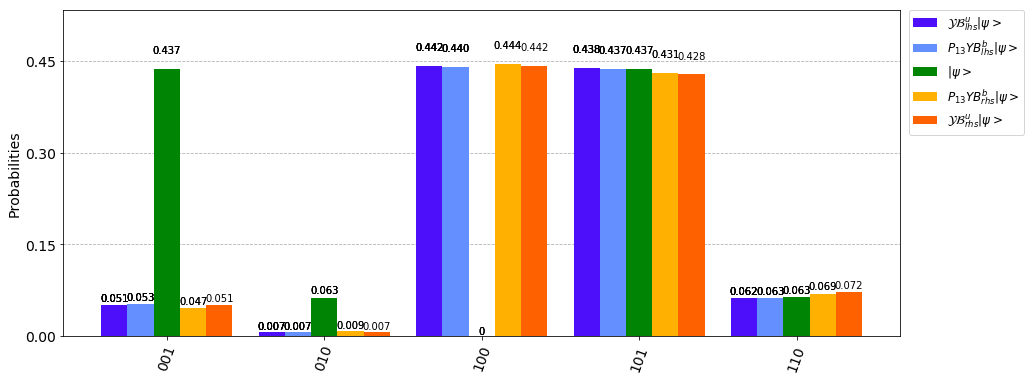

In [33]:
shots=4096
backend = Aer.get_backend('qasm_simulator')

#separated algorithms
keya=key+'_direct'
keyb=key+'_perp'
job0.update({keya:execute(lhsUcta, backend, shots=shots)})
job1.update({keya:execute(lhsBcta, backend, shots=shots)})
#initial state
job2.update({keya:execute(circuit01t, backend, shots=shots)})


#adjacent algorithms
job3.update({keya:execute(rhsBcta, backend, shots=shots)})
job4.update({keya:execute(rhsUcta, backend, shots=shots)})
#initial state
#job02=execute(circuit02, backend, shots=shots) 


job0.update({keyb:execute(lhsUctb, backend, shots=shots)})
job1.update({keyb:execute(lhsBctb, backend, shots=shots)})
#initial state
job2.update({keyb:execute(circuit02t, backend, shots=shots)})


#adjacent algorithms
job3.update({keyb:execute(rhsBctb, backend, shots=shots)})
job4.update({keyb:execute(rhsUctb, backend, shots=shots)})

legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
plot_histogram([sumajob(job0[keya],job0[keyb]),
                sumajob(job1[keya],job1[keyb]),
                sumajob(job2[keya],job2[keyb]),
                sumajob(job3[keya],job3[keyb]),
                sumajob(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)

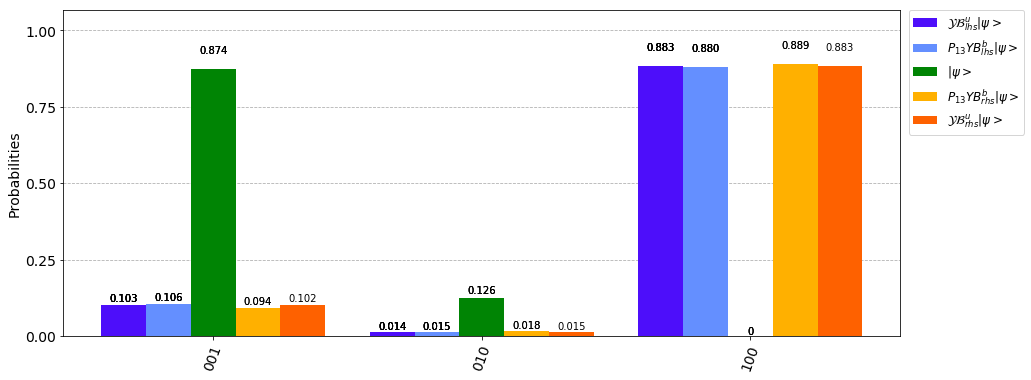

In [34]:

plot_histogram([job0[key+'_direct'].result().get_counts(),
                job1[key+'_direct'].result().get_counts(),
                job2[key+'_direct'].result().get_counts(),
                job3[key+'_direct'].result().get_counts(),
                job4[key+'_direct'].result().get_counts()],
                figsize=(15,6),legend=legend,color=color)

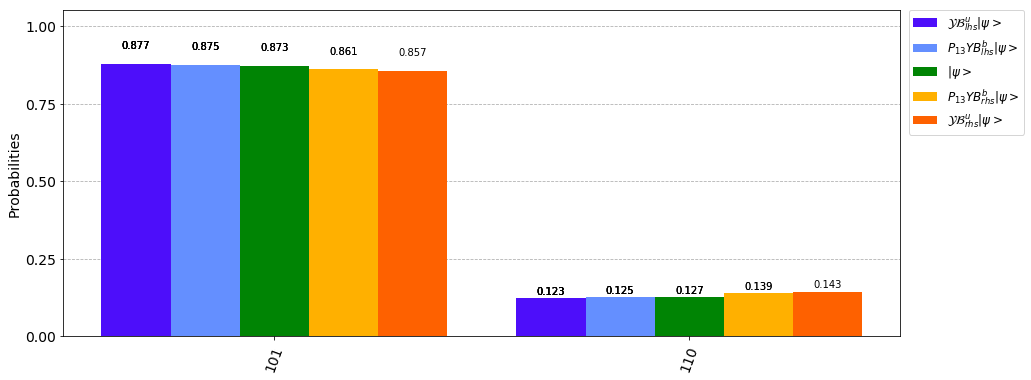

In [35]:

plot_histogram([job0[key+'_perp'].result().get_counts(),
                job1[key+'_perp'].result().get_counts(),
                job2[key+'_perp'].result().get_counts(),
                job3[key+'_perp'].result().get_counts(),
                job4[key+'_perp'].result().get_counts()],
                figsize=(15,6),legend=legend,color=color)

# Experiment with ibmq_ourense

In [36]:
# Real Backend
key='ibmq_ourense'
backend = provider.get_backend(key)


initial_layout=[0,1,2]


lhsUcta = transpile(lhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBcta = transpile(lhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBcta = transpile(rhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUcta = transpile(rhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUcta = lhsUcta.bind_parameters(subsprim)
lhsBcta = lhsBcta.bind_parameters(subsprim)
rhsBcta = rhsBcta.bind_parameters(subsprim)
rhsUcta = rhsUcta.bind_parameters(subsprim)

lhsUctb = transpile(lhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBctb = transpile(lhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBctb = transpile(rhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUctb = transpile(rhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit02t = transpile(circuit02, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsUctb = lhsUctb.bind_parameters(subsprim)
lhsBctb = lhsBctb.bind_parameters(subsprim)
rhsBctb = rhsBctb.bind_parameters(subsprim)
rhsUctb = rhsUctb.bind_parameters(subsprim)

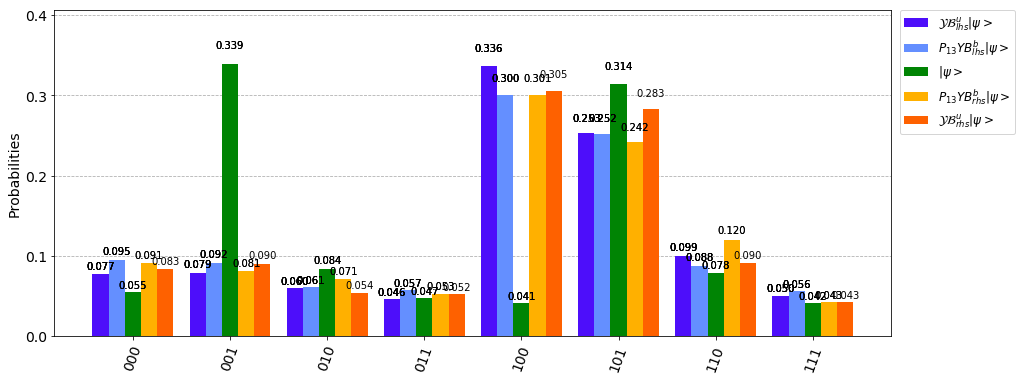

In [37]:
if secure_mode:
    keya=key+'_direct'
    keyb=key+'_perp'
    job0.update({keya:job[keya][0]})
    job1.update({keya:job[keya][1]})
    #initial state
    job2.update({keya:job[keya][2]})


    #adjacent algorithms
    job3.update({keya:job[keya][3]})
    job4.update({keya:job[keya][4]})


    job0.update({keyb:job[keyb][0]})
    job1.update({keyb:job[keyb][1]})
    #initial state
    job2.update({keyb:job[keyb][2]})


    #adjacent algorithms
    job3.update({keyb:job[keyb][3]})
    job4.update({keyb:job[keyb][4]})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([suma(job0[keya],job0[keyb]),
                suma(job1[keya],job1[keyb]),
                suma(job2[keya],job2[keyb]),
                suma(job3[keya],job3[keyb]),
                suma(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)
else:
    shots=4096

    #separated algorithms
    keya=key+'_direct'
    keyb=key+'_perp'
    job0.update({keya:execute(lhsUcta, backend, shots=shots)})
    job1.update({keya:execute(lhsBcta, backend, shots=shots)})
    #initial state
    job2.update({keya:execute(circuit01t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({keya:execute(rhsBcta, backend, shots=shots)})
    job4.update({keya:execute(rhsUcta, backend, shots=shots)})
    #initial state
    #job02=execute(circuit02, backend, shots=shots) 


    job0.update({keyb:execute(lhsUctb, backend, shots=shots)})
    job1.update({keyb:execute(lhsBctb, backend, shots=shots)})
    #initial state
    job2.update({keyb:execute(circuit02t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({keyb:execute(rhsBctb, backend, shots=shots)})
    job4.update({keyb:execute(rhsUctb, backend, shots=shots)})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([sumajob(job0[keya],job0[keyb]),
                sumajob(job1[keya],job1[keyb]),
                sumajob(job2[keya],job2[keyb]),
                sumajob(job3[keya],job3[keyb]),
                sumajob(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)

p

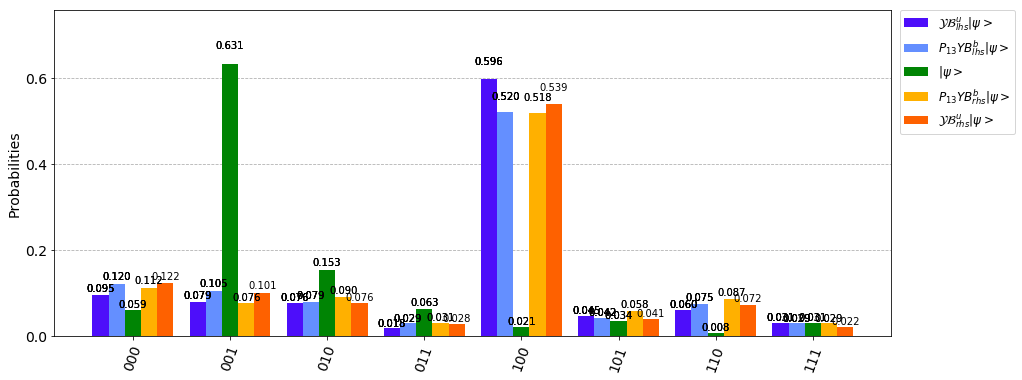

In [38]:
if secure_mode:
    p=plot_histogram([job0[key+'_direct'],
                job1[key+'_direct'],
                job2[key+'_direct'],
                job3[key+'_direct'],
                job4[key+'_direct']],
                figsize=(15,6),legend=legend,color=color)
else:
    p=plot_histogram([job0[key+'_direct'].result().get_counts(),
                    job1[key+'_direct'].result().get_counts(),
                    job2[key+'_direct'].result().get_counts(),
                    job3[key+'_direct'].result().get_counts(),
                    job4[key+'_direct'].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)
p

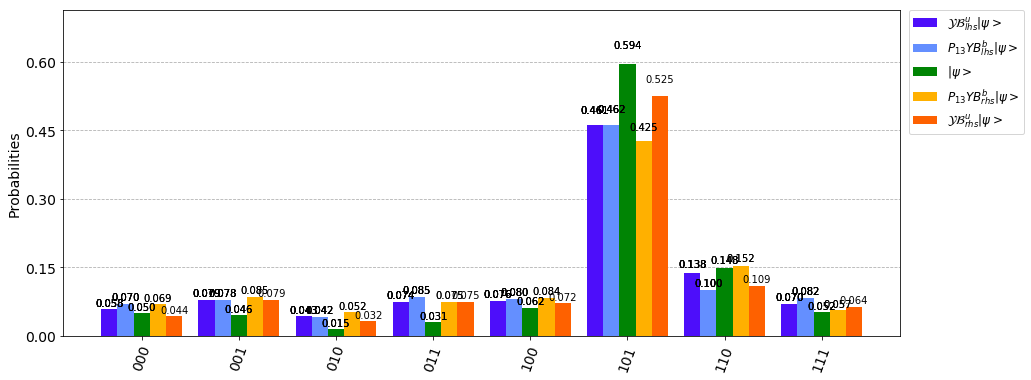

In [39]:
if secure_mode:
    p=plot_histogram([job0[key+'_perp'],
                job1[key+'_perp'],
                job2[key+'_perp'],
                job3[key+'_perp'],
                job4[key+'_perp']],
                figsize=(15,6),legend=legend,color=color)
else:
    p=plot_histogram([job0[key+'_perp'].result().get_counts(),
                    job1[key+'_perp'].result().get_counts(),
                    job2[key+'_perp'].result().get_counts(),
                    job3[key+'_perp'].result().get_counts(),
                    job4[key+'_perp'].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)
p

# Experiment with ibmqx2

In [40]:
# Real Backend
key='ibmqx2'
backend = provider.get_backend(key)


initial_layout=[2,3,4]


lhsUcta = transpile(lhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBcta = transpile(lhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBcta = transpile(rhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUcta = transpile(rhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUcta = lhsUcta.bind_parameters(subsprim)
lhsBcta = lhsBcta.bind_parameters(subsprim)
rhsBcta = rhsBcta.bind_parameters(subsprim)
rhsUcta = rhsUcta.bind_parameters(subsprim)

lhsUctb = transpile(lhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBctb = transpile(lhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBctb = transpile(rhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUctb = transpile(rhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit02t = transpile(circuit02, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsUctb = lhsUctb.bind_parameters(subsprim)
lhsBctb = lhsBctb.bind_parameters(subsprim)
rhsBctb = rhsBctb.bind_parameters(subsprim)
rhsUctb = rhsUctb.bind_parameters(subsprim)

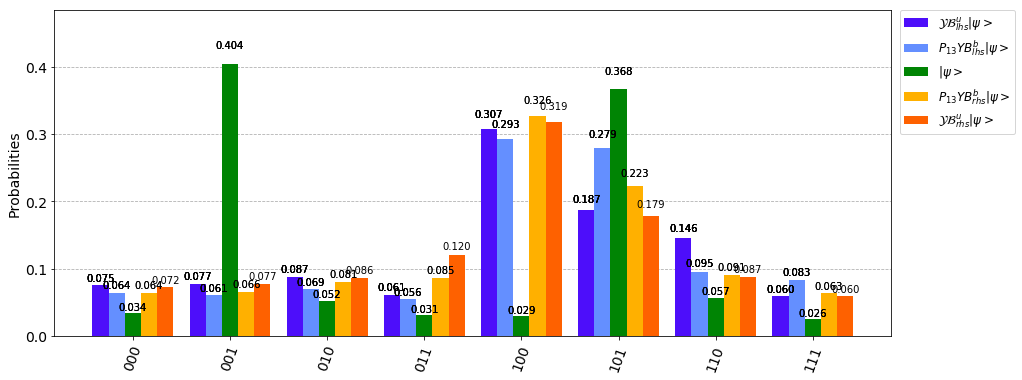

In [41]:
if secure_mode:
    keya=key+'_direct'
    keyb=key+'_perp'
    job0.update({keya:job[keya][0]})
    job1.update({keya:job[keya][1]})
    #initial state
    job2.update({keya:job[keya][2]})


    #adjacent algorithms
    job3.update({keya:job[keya][3]})
    job4.update({keya:job[keya][4]})


    job0.update({keyb:job[keyb][0]})
    job1.update({keyb:job[keyb][1]})
    #initial state
    job2.update({keyb:job[keyb][2]})


    #adjacent algorithms
    job3.update({keyb:job[keyb][3]})
    job4.update({keyb:job[keyb][4]})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([suma(job0[keya],job0[keyb]),
                suma(job1[keya],job1[keyb]),
                suma(job2[keya],job2[keyb]),
                suma(job3[keya],job3[keyb]),
                suma(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)
else:
    shots=4096

    #separated algorithms
    keya=key+'_direct'
    keyb=key+'_perp'
    job0.update({keya:execute(lhsUcta, backend, shots=shots)})
    job1.update({keya:execute(lhsBcta, backend, shots=shots)})
    #initial state
    job2.update({keya:execute(circuit01t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({keya:execute(rhsBcta, backend, shots=shots)})
    job4.update({keya:execute(rhsUcta, backend, shots=shots)})
    #initial state
    #job02=execute(circuit02, backend, shots=shots) 


    job0.update({keyb:execute(lhsUctb, backend, shots=shots)})
    job1.update({keyb:execute(lhsBctb, backend, shots=shots)})
    #initial state
    job2.update({keyb:execute(circuit02t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({keyb:execute(rhsBctb, backend, shots=shots)})
    job4.update({keyb:execute(rhsUctb, backend, shots=shots)})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([sumajob(job0[keya],job0[keyb]),
                sumajob(job1[keya],job1[keyb]),
                sumajob(job2[keya],job2[keyb]),
                sumajob(job3[keya],job3[keyb]),
                sumajob(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)

p

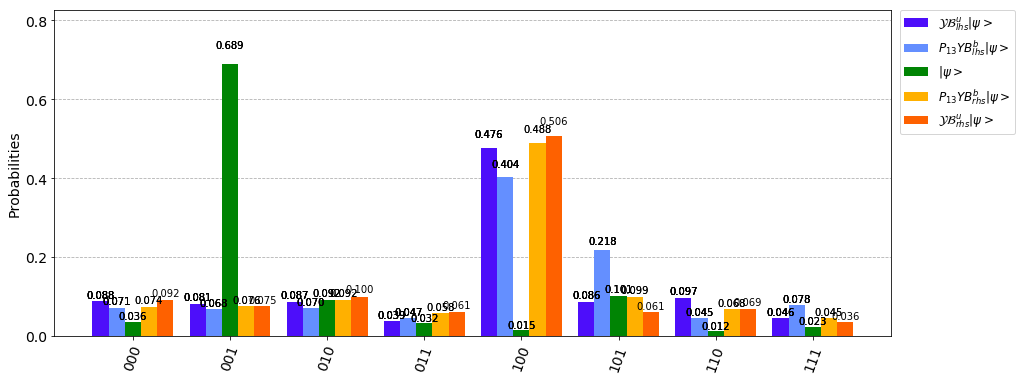

In [42]:
if secure_mode:
    p=plot_histogram([job0[key+'_direct'],
                job1[key+'_direct'],
                job2[key+'_direct'],
                job3[key+'_direct'],
                job4[key+'_direct']],
                figsize=(15,6),legend=legend,color=color)
else:
    p=plot_histogram([job0[key+'_direct'].result().get_counts(),
                    job1[key+'_direct'].result().get_counts(),
                    job2[key+'_direct'].result().get_counts(),
                    job3[key+'_direct'].result().get_counts(),
                    job4[key+'_direct'].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)
p

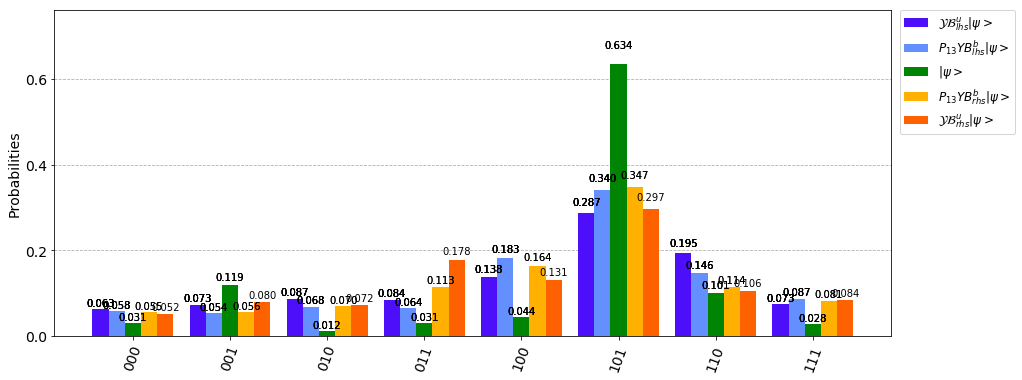

In [43]:
if secure_mode:
    p=plot_histogram([job0[key+'_perp'],
                job1[key+'_perp'],
                job2[key+'_perp'],
                job3[key+'_perp'],
                job4[key+'_perp']],
                figsize=(15,6),legend=legend,color=color)
else:
    p=plot_histogram([job0[key+'_perp'].result().get_counts(),
                    job1[key+'_perp'].result().get_counts(),
                    job2[key+'_perp'].result().get_counts(),
                    job3[key+'_perp'].result().get_counts(),
                    job4[key+'_perp'].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)
p

# Experiment with ibmq_johannesburg

In [44]:
# Real Backend
key='ibmq_johannesburg'
backend = provider.get_backend(key)


initial_layout=[1,0,5]


lhsUcta = transpile(lhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBcta = transpile(lhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBcta = transpile(rhsBca, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUcta = transpile(rhsUca, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit01t = transpile(circuit01, backend=backend,  initial_layout=initial_layout,optimization_level=3)

lhsUcta = lhsUcta.bind_parameters(subsprim)
lhsBcta = lhsBcta.bind_parameters(subsprim)
rhsBcta = rhsBcta.bind_parameters(subsprim)
rhsUcta = rhsUcta.bind_parameters(subsprim)

lhsUctb = transpile(lhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsBctb = transpile(lhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsBctb = transpile(rhsBcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
rhsUctb = transpile(rhsUcb, backend=backend, initial_layout=initial_layout,optimization_level=3)
circuit02t = transpile(circuit02, backend=backend, initial_layout=initial_layout,optimization_level=3)
lhsUctb = lhsUctb.bind_parameters(subsprim)
lhsBctb = lhsBctb.bind_parameters(subsprim)
rhsBctb = rhsBctb.bind_parameters(subsprim)
rhsUctb = rhsUctb.bind_parameters(subsprim)

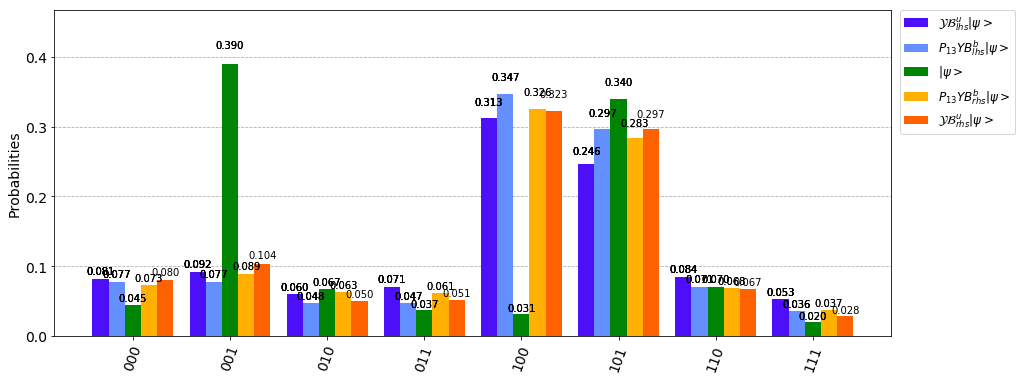

In [45]:
if secure_mode:
    keya=key+'_direct'
    keyb=key+'_perp'
    job0.update({keya:job[keya][0]})
    job1.update({keya:job[keya][1]})
    #initial state
    job2.update({keya:job[keya][2]})


    #adjacent algorithms
    job3.update({keya:job[keya][3]})
    job4.update({keya:job[keya][4]})


    job0.update({keyb:job[keyb][0]})
    job1.update({keyb:job[keyb][1]})
    #initial state
    job2.update({keyb:job[keyb][2]})


    #adjacent algorithms
    job3.update({keyb:job[keyb][3]})
    job4.update({keyb:job[keyb][4]})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([suma(job0[keya],job0[keyb]),
                suma(job1[keya],job1[keyb]),
                suma(job2[keya],job2[keyb]),
                suma(job3[keya],job3[keyb]),
                suma(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)
else:
    shots=4096

    #separated algorithms
    keya=key+'_direct'
    keyb=key+'_perp'
    job0.update({keya:execute(lhsUcta, backend, shots=shots)})
    job1.update({keya:execute(lhsBcta, backend, shots=shots)})
    #initial state
    job2.update({keya:execute(circuit01t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({keya:execute(rhsBcta, backend, shots=shots)})
    job4.update({keya:execute(rhsUcta, backend, shots=shots)})
    #initial state
    #job02=execute(circuit02, backend, shots=shots) 


    job0.update({keyb:execute(lhsUctb, backend, shots=shots)})
    job1.update({keyb:execute(lhsBctb, backend, shots=shots)})
    #initial state
    job2.update({keyb:execute(circuit02t, backend, shots=shots)})


    #adjacent algorithms
    job3.update({keyb:execute(rhsBctb, backend, shots=shots)})
    job4.update({keyb:execute(rhsUctb, backend, shots=shots)})

    legend = ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']
    p=plot_histogram([sumajob(job0[keya],job0[keyb]),
                sumajob(job1[keya],job1[keyb]),
                sumajob(job2[keya],job2[keyb]),
                sumajob(job3[keya],job3[keyb]),
                sumajob(job4[keya],job4[keyb])]
                ,figsize=(15,6),legend=legend,color=color)

p

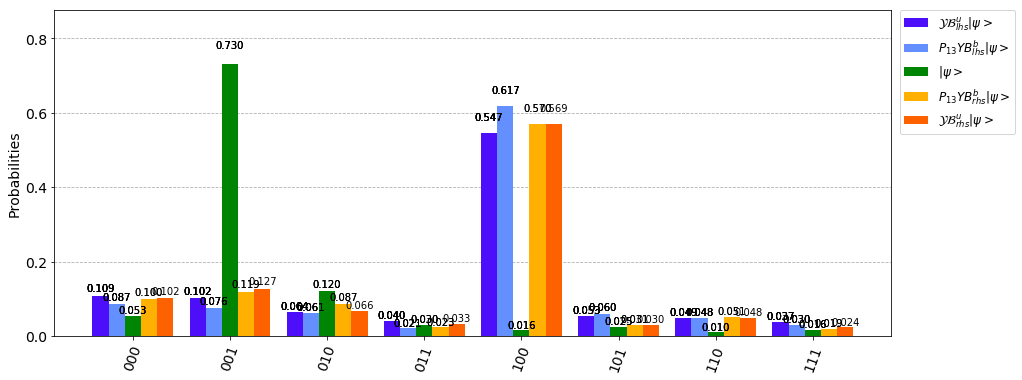

In [46]:
if secure_mode:
    p=plot_histogram([job0[key+'_direct'],
                job1[key+'_direct'],
                job2[key+'_direct'],
                job3[key+'_direct'],
                job4[key+'_direct']],
                figsize=(15,6),legend=legend,color=color)
else:
    p=plot_histogram([job0[key+'_direct'].result().get_counts(),
                    job1[key+'_direct'].result().get_counts(),
                    job2[key+'_direct'].result().get_counts(),
                    job3[key+'_direct'].result().get_counts(),
                    job4[key+'_direct'].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)
p

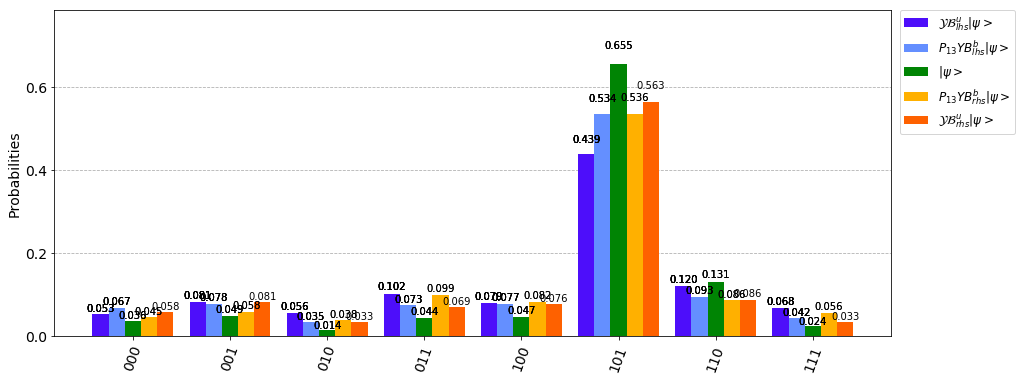

In [47]:
if secure_mode:
    p=plot_histogram([job0[key+'_perp'],
                job1[key+'_perp'],
                job2[key+'_perp'],
                job3[key+'_perp'],
                job4[key+'_perp']],
                figsize=(15,6),legend=legend,color=color)
else:
    p=plot_histogram([job0[key+'_perp'].result().get_counts(),
                    job1[key+'_perp'].result().get_counts(),
                    job2[key+'_perp'].result().get_counts(),
                    job3[key+'_perp'].result().get_counts(),
                    job4[key+'_perp'].result().get_counts()],
                    figsize=(15,6),legend=legend,color=color)
p

In [48]:

import pickle
import datetime
def save(x1,x2,theta,job0,job1,job2,job3,job4):
    job={}
    job.update({'legend': ['$\mathcal{YB}^u_{lhs}|\psi >$','$P_{13}{YB}^b_{lhs}|\psi >$','$|\psi >$','$P_{13}{YB}^b_{rhs}|\psi >$', '$\mathcal{YB}^u_{rhs}|\psi >$']})
    job.update({'parameters':{'x':x1,'y':x2,'theta':theta}})
    for key in job1:
        try:
            job.update({key:[job0[key].result().get_counts(),job1[key].result().get_counts(),
            job2[key].result().get_counts(),job3[key].result().get_counts(),
            job4[key].result().get_counts()]})
        except:
            ;
    date = datetime.datetime.now()

    now=str(date.day)+'_'+str(date.month)+'_'+str(date.year)+'_'+str(date.hour)+'_'+str(date.minute)

    f = open("experiments/exp1_real_"+now+".pkl","wb")
    pickle.dump(job,f)
    f.close()


if not secure_mode:
    save(x1,x2,theta,job0,job1,job2,job3,job4)